In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### 데이터 불러오기

In [2]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images


df = pd.read_csv('data/annotations/list.txt', delimiter=' ', header  = None ,skiprows=6)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349 entries, 0 to 7348
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7349 non-null   object
 1   id         7349 non-null   int64 
 2   species    7349 non-null   int64 
 3   breed      7349 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 229.8+ KB


In [4]:
# 1 cat
# 2 dog

df.species.value_counts().sort_index()

1    2371
2    4978
Name: species, dtype: int64

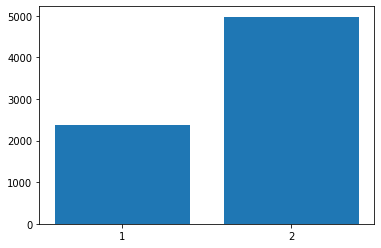

In [5]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

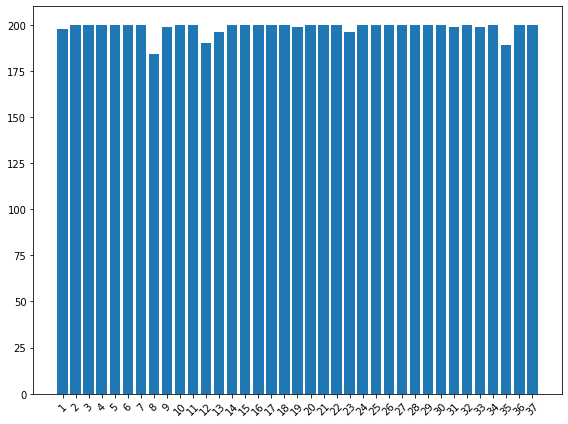

In [6]:
value_counts = df['id'].value_counts().sort_index()

plt.figure(figsize = (8,6))
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show() 

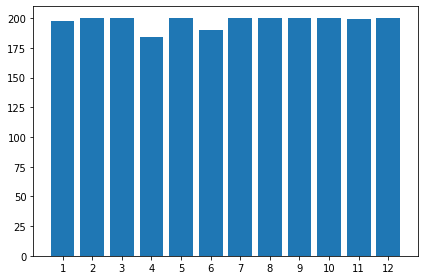

In [7]:
value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

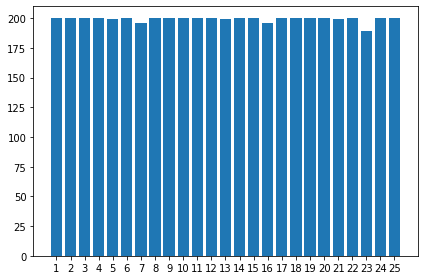

In [8]:
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [9]:
import os 
from  glob import glob

In [10]:
image_dir = 'data/images/'
bbox_dir = 'data/annotations/xmls/'
seg_dir = 'data/annotations/trimaps/'

In [11]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [12]:
image_files[ : 10]

['data/images/Egyptian_Mau_167.jpg',
 'data/images/pug_52.jpg',
 'data/images/basset_hound_112.jpg',
 'data/images/Siamese_193.jpg',
 'data/images/shiba_inu_122.jpg',
 'data/images/Siamese_53.jpg',
 'data/images/Birman_167.jpg',
 'data/images/leonberger_6.jpg',
 'data/images/Siamese_47.jpg',
 'data/images/shiba_inu_136.jpg']

In [13]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7390

In [14]:
seg_files[:10]

['data/annotations/trimaps/american_pit_bull_terrier_172.png',
 'data/annotations/trimaps/boxer_190.png',
 'data/annotations/trimaps/Sphynx_8.png',
 'data/annotations/trimaps/keeshond_37.png',
 'data/annotations/trimaps/Siamese_5.png',
 'data/annotations/trimaps/Bengal_99.png',
 'data/annotations/trimaps/boxer_184.png',
 'data/annotations/trimaps/keeshond_23.png',
 'data/annotations/trimaps/american_pit_bull_terrier_99.png',
 'data/annotations/trimaps/american_pit_bull_terrier_166.png']

In [15]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [16]:
bbox_files[:10]

['data/annotations/xmls/British_Shorthair_10.xml',
 'data/annotations/xmls/german_shorthaired_119.xml',
 'data/annotations/xmls/english_setter_158.xml',
 'data/annotations/xmls/Siamese_178.xml',
 'data/annotations/xmls/pomeranian_162.xml',
 'data/annotations/xmls/newfoundland_137.xml',
 'data/annotations/xmls/Siamese_150.xml',
 'data/annotations/xmls/german_shorthaired_131.xml',
 'data/annotations/xmls/english_setter_170.xml',
 'data/annotations/xmls/english_setter_164.xml']

In [17]:
# 실시간 이미지/영상처리에 사용하는 라이브러리
import cv2

import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

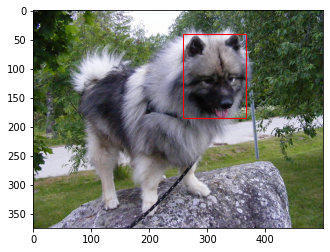

In [18]:
image_path = image_files[110]
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # opencv로 이미지를 갖고 올때 BGR을 RGB 설정 필요 

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

# 좌상단 좌표와 가로와 세로의 길이 
rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin


rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show()

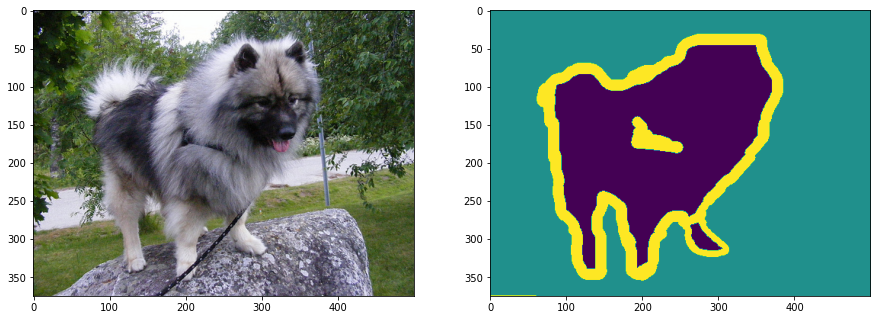

In [19]:
image_path = image_files[110]
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)

plt.show()

In [22]:
from sklearn.model_selection import KFold

kf = KFold(n_splits= 5 , shuffle= True , random_state= 3)

# 향후 사용을 위해 저장 

df['fold'] = -1
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   1    2    3 ... 7345 7347 7348] [   0   17   20 ... 7338 7340 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   6    8    9 ... 7339 7344 7348] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7337 7341 7343] 1470
[   0    3    4 ... 7344 7346 7348] [   1    2   11 ... 7335 7345 7347] 1470
[   0    1    2 ... 7346 7347 7348] [   7   13   14 ... 7326 7329 7342] 1469


In [23]:
print(len(df[df['fold'] == 1]))
print(len(df[df['fold'] != 1]))

1470
5879


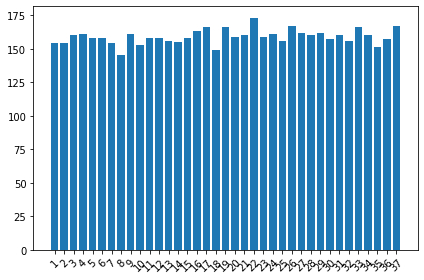

In [26]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [27]:
# 각 fold 마다 클래스별 이미지가 균등하게 이루어질 수 있도록 하기 위해 StratifiedKFold 사용

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


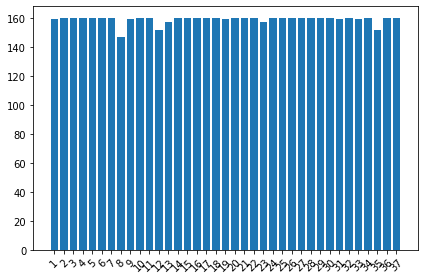

In [28]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [29]:
df.to_csv('data/kfolds.csv', index=False)